In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("loan_data_set.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
data =df

In [7]:
data.drop("Loan_ID",axis=1,inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
import seaborn as sns

In [11]:
cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area',"Loan_Amount_Term","Credit_History"]

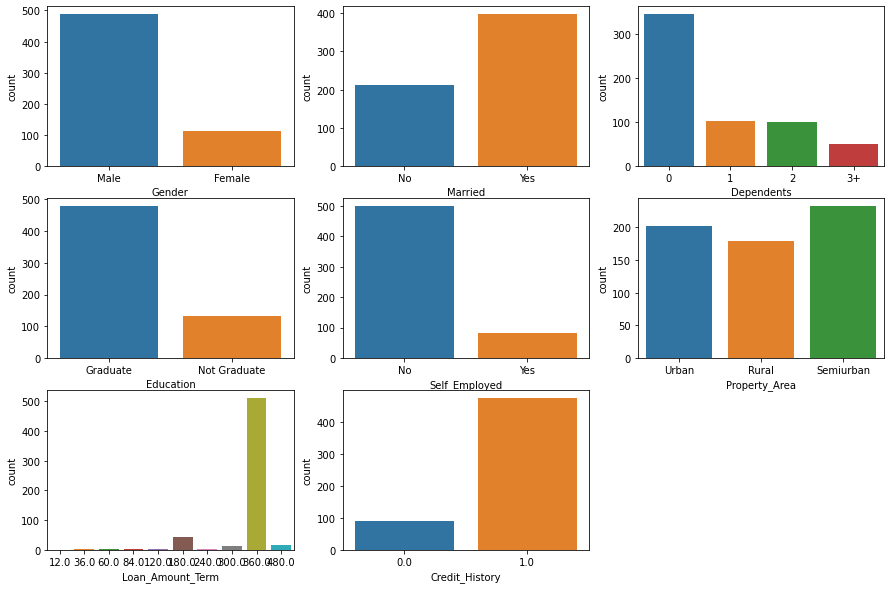

In [12]:
plt.figure(figsize=(15,10))
for i in enumerate(cat_cols):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(data=df,x=i[1])

<AxesSubplot:xlabel='Loan_Amount_Term'>

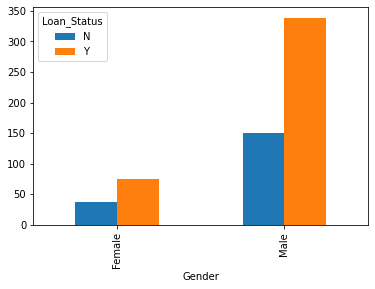

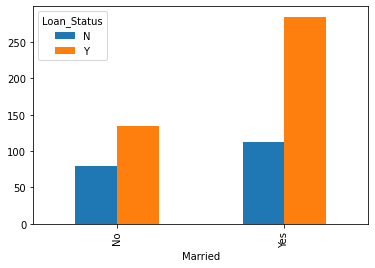

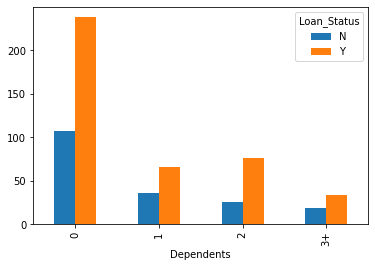

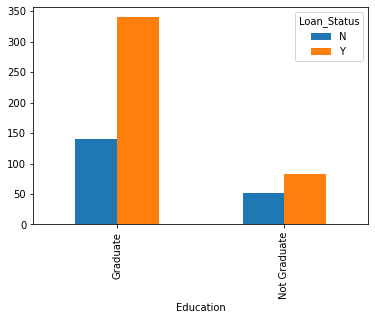

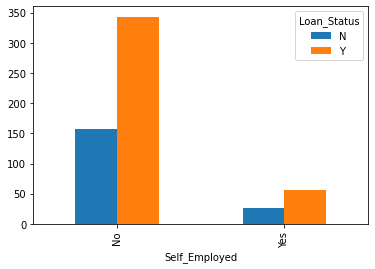

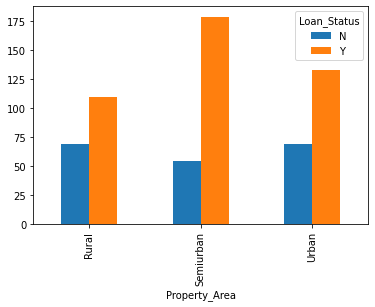

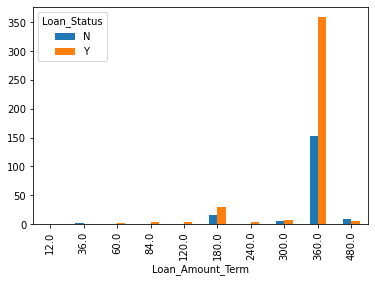

In [13]:
pd.crosstab(df.Gender,df.Loan_Status).plot(kind="bar")
pd.crosstab(df.Married,df.Loan_Status).plot(kind="bar")
pd.crosstab(df.Dependents,df.Loan_Status).plot(kind="bar")
pd.crosstab(df.Education,df.Loan_Status).plot(kind="bar")
pd.crosstab(df.Self_Employed,df.Loan_Status).plot(kind="bar")
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar")
pd.crosstab(df.Loan_Amount_Term,df.Loan_Status).plot(kind="bar")

In [14]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'] = df['Dependents'].replace("3+", 3 )


In [15]:
df['Dependents'] = data['Dependents'].astype(int)

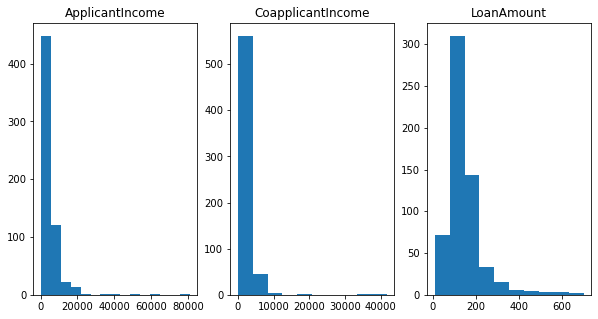

In [16]:
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount']
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.hist(df["ApplicantIncome"],bins=15)
plt.title('ApplicantIncome')
plt.subplot(1, 3, 2)
plt.hist(df["CoapplicantIncome"])
plt.title('CoapplicantIncome')
plt.subplot(1, 3, 3)
plt.hist(df["LoanAmount"])
plt.title('LoanAmount')
plt.show()

In [17]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [18]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\tarek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tarek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tarek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


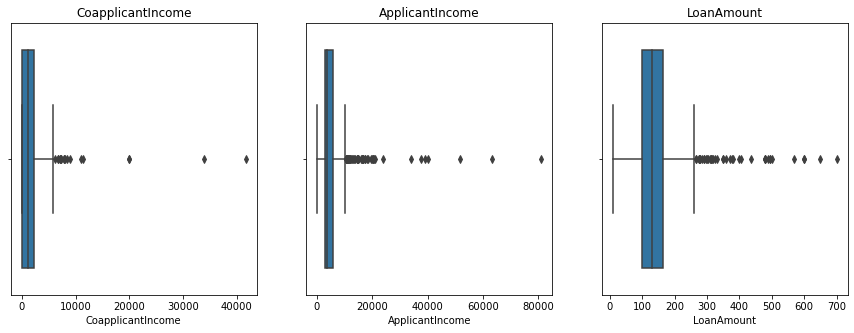

In [19]:
#sns.boxplot(df["CoapplicantIncome"])
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.boxplot(df["CoapplicantIncome"])
plt.title('CoapplicantIncome')
plt.subplot(1, 3, 2)
sns.boxplot(df["ApplicantIncome"])
plt.title('ApplicantIncome')

plt.subplot(1, 3, 3)
sns.boxplot(df["LoanAmount"])
plt.title('LoanAmount')
plt.show()

In [20]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
corr_mat=df.corr()
corr_mat["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Dependents           0.010118
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

In [21]:
#MORE
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] == 0, 1e-10, df['CoapplicantIncome'])

# Apply np.log to the column
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])
df["LoanAmount"]=np.log(df["LoanAmount"])

<AxesSubplot:>

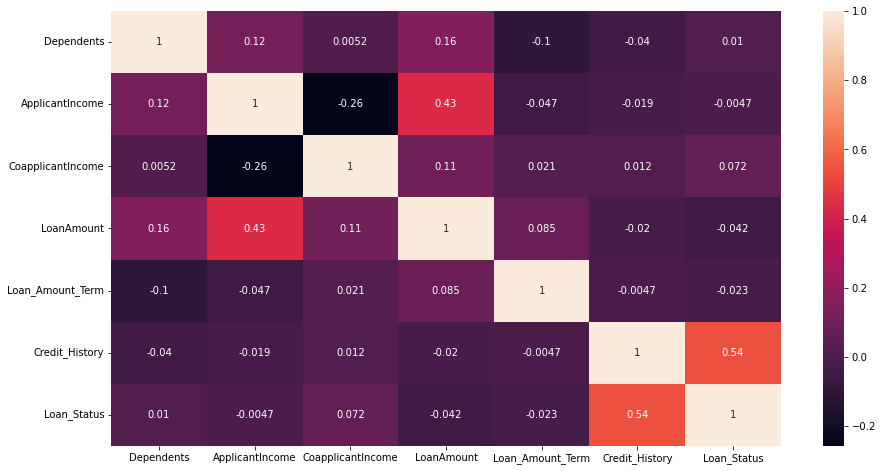

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [23]:
from sklearn.preprocessing import OneHotEncoder


df['Gender'] = df['Gender'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Self_Employed'] = df['Self_Employed'].astype('category')
df['Property_Area'] = df['Property_Area'].astype('category')
df['Loan_Status'] = df['Loan_Status'].astype('category')
df['Married'] = df['Married'].astype('category')
df['Dependents'] = df['Dependents'].astype('category')


In [24]:
cols = ['Gender',"ApplicantIncome","Dependents","CoapplicantIncome"]
df.drop(columns=cols,inplace=True)

In [25]:
# Select the columns to be one-hot encoded
columns_to_encode = ['Married','Education','Self_Employed','Property_Area']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit the encoder on the selected columns and transform the data
encoded_data = encoder.fit_transform(df[columns_to_encode])

# Create column names for the encoded features
encoded_column_names = encoder.get_feature_names(columns_to_encode)

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names)

# Concatenate the original DataFrame and the encoded DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

C:\Users\tarek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
df_encoded.columns
df=df_encoded
df

,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,No,Graduate,No,4.986426,360.0,1.0,Urban,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Yes,Graduate,No,4.852030,360.0,1.0,Rural,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Yes,Graduate,Yes,4.189655,360.0,1.0,Urban,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,Yes,Not Graduate,No,4.787492,360.0,1.0,Urban,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,No,Graduate,No,4.948760,360.0,1.0,Urban,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,Graduate,No,4.262680,360.0,1.0,Rural,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,Yes,Graduate,No,3.688879,180.0,1.0,Rural,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
611,Yes,Graduate,No,5.533389,360.0,1.0,Urban,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
612,Yes,Graduate,No,5.231109,360.0,1.0,Urban,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:

df.drop(columns=columns_to_encode,axis =1 ,inplace=True)
df

,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4.986426,360.0,1.0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4.852030,360.0,1.0,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,4.189655,360.0,1.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4.787492,360.0,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,4.948760,360.0,1.0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,4.262680,360.0,1.0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,3.688879,180.0,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
611,5.533389,360.0,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
612,5.231109,360.0,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [28]:
#from sklearn.preprocessing import OneHotEncoder
#column = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
#        'Property_Area', 'Loan_Status']

#for i in column:
 # df[i+"new"]=df[i].cat.codes

In [29]:
#enc = OneHotEncoder()
#enc_data=pd.DataFrame(enc.fit_transform(
#   df[column]).toarray())

#df.drop(column,axis =1,inplace =True)

In [30]:
#corr_mat=df.corr()
#corr_mat["Loan_Statusn"].sort_values(ascending=False)
#df.corr()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   LoanAmount               614 non-null    float64 
 1   Loan_Amount_Term         614 non-null    float64 
 2   Credit_History           614 non-null    float64 
 3   Loan_Status              614 non-null    category
 4   Married_No               614 non-null    float64 
 5   Married_Yes              614 non-null    float64 
 6   Education_Graduate       614 non-null    float64 
 7   Education_Not Graduate   614 non-null    float64 
 8   Self_Employed_No         614 non-null    float64 
 9   Self_Employed_Yes        614 non-null    float64 
 10  Property_Area_Rural      614 non-null    float64 
 11  Property_Area_Semiurban  614 non-null    float64 
 12  Property_Area_Urban      614 non-null    float64 
dtypes: category(1), float64(12)
memory usage: 58.4 KB


In [32]:
df.columns

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [33]:
#df.drop("Self_Employednew",axis=1,inplace=True)
#df.drop("Gendernew",axis=1,inplace=True)

#df.drop("LoanAmount",axis=1,inplace=True)

In [34]:
y=df["Loan_Status"]
x=df.drop("Loan_Status",axis=1)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [36]:
X_train.shape

(491, 12)

In [37]:
y_test.shape

(123,)

In [38]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\tarek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pre=model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, classification_report , mean_squared_error
accuracy_score(y_test,y_pre)

0.7886178861788617

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5) 

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.84848485 0.80612245 0.82653061 0.78571429 0.80612245]
Mean Accuracy: 0.8145949288806431


C:\Users\tarek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tarek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [42]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



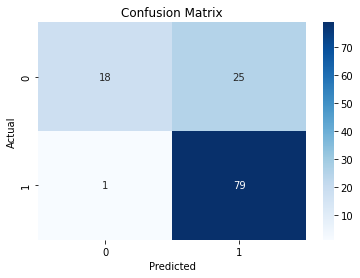

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pre)

# Convert confusion matrix to a pandas DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Create heatmap
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and ticks to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'])

# Display the plot
plt.show()


In [44]:

mean_squared_error(y_test,y_pre)


0.21138211382113822

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [46]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',C=1,gamma=0.01)
classifier.fit(x_train_scaled, y_train)

SVC(C=1, gamma=0.01)

In [47]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_pred = classifier.predict(x_test_scaled)
metrics.accuracy_score(y_pred, y_test)

0.7886178861788617

In [48]:
#Finding the best parameter
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 1, 100, 1000], 
              'gamma': [1, 0.1, 0.01,0.001 ],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.697 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.697 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.697 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 1, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [49]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [50]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(accuracy_score(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

0.7723577235772358
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train_scaled, y_train, cv=5) 

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.84848485 0.80612245 0.82653061 0.78571429 0.80612245]
Mean Accuracy: 0.8145949288806431


In [53]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier # Import train_test_split function #Import scikit-learn metric

clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.7642276422764228

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



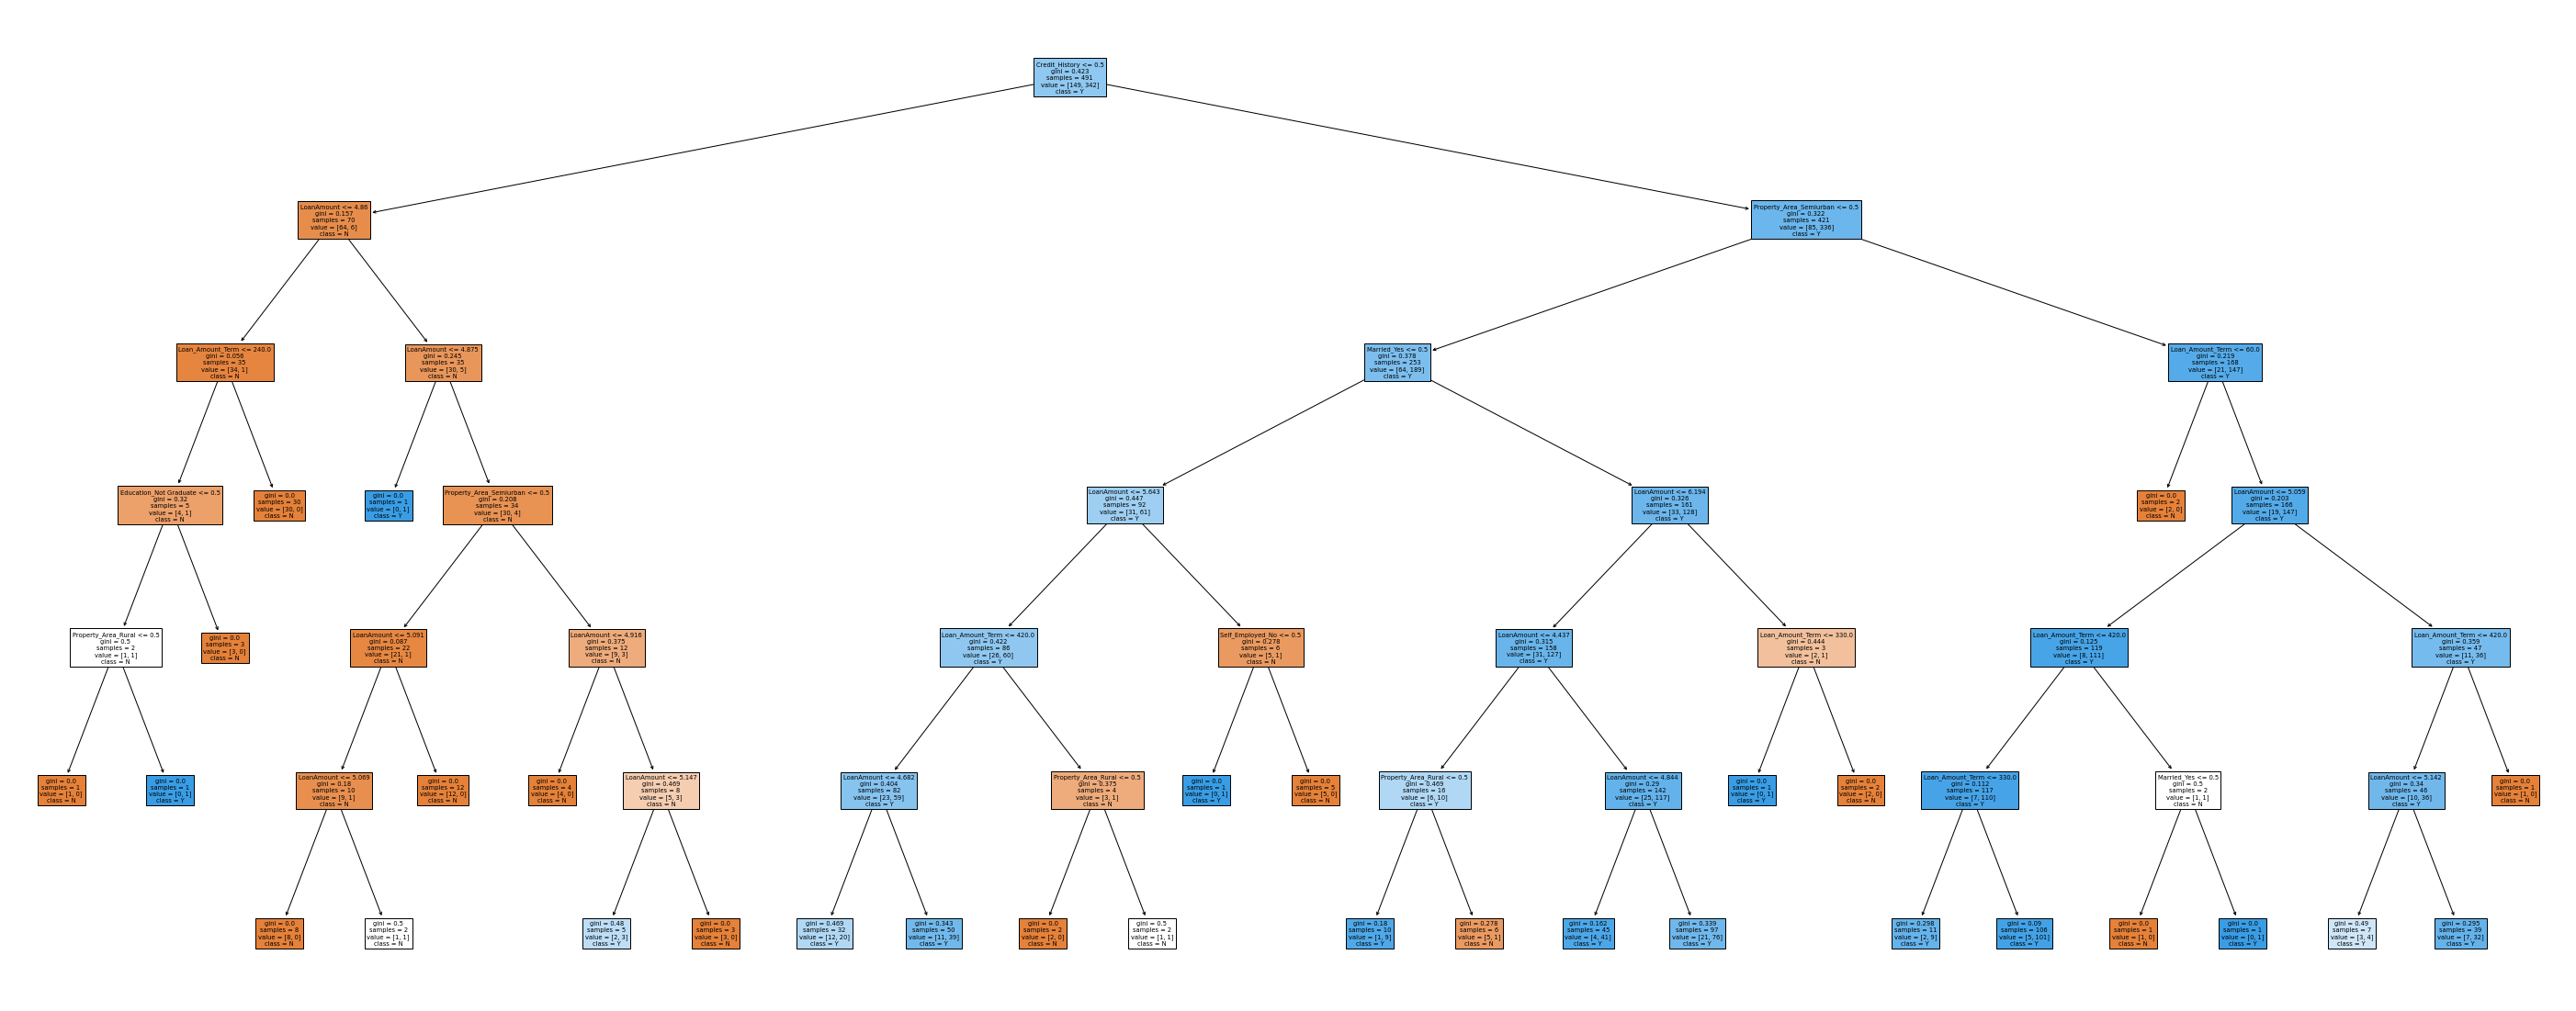

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 20))
plot_tree(clf, feature_names=X_train.columns, class_names=["N","Y"], filled=True)
plt.show()

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5) 

In [57]:
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.86868687 0.79591837 0.75510204 0.73469388 0.7755102 ]
Mean Accuracy: 0.7859822716965573


In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)

model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [59]:
y_pre=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7642276422764228

In [60]:
scores = cross_val_score(model, X_train, y_train, cv=5) 

In [61]:
scores

array([0.7979798 , 0.75510204, 0.76530612, 0.7244898 , 0.81632653])

In [62]:
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.7979798  0.75510204 0.76530612 0.7244898  0.81632653]
Mean Accuracy: 0.7718408575551432
